In [41]:
import torch

In [42]:
inputs = torch.tensor([
    [0.43, 0.15, 0.89], # Your      (x^1)
    [0.55, 0.87, 0.66], # journey   (x^2)
    [0.57, 0.85, 0.64], # starts    (x^3)
    [0.22, 0.58, 0.33], # with      (x^4)
    [0.77, 0.25, 0.10], # one       (x^5)
    [0.05, 0.80, 0.55]  # step      (x^6)
])

In [43]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [44]:
torch.manual_seed(666)

Wq = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
Wk = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
Wv = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [45]:
query_2 = x_2 @ Wq
key_2 = x_2 @ Wk
value_2 = x_2 @ Wv

In [46]:
print(query_2)

tensor([0.3927, 0.2485])


In [47]:
# Obtaining All Keys and Values via Matrix Multiplication:

keys = inputs @ Wk
values = inputs @ Wv

In [48]:
print("Keys Shape =>", keys.shape)
print("Values Shape =>", values.shape)

Keys Shape => torch.Size([6, 2])
Values Shape => torch.Size([6, 2])


In [49]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)

In [50]:
print(attn_score_22)

tensor(0.4365)


In [51]:
# All Attention Scores for Query 02:

attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([0.3092, 0.4365, 0.4303, 0.2429, 0.1968, 0.3191])


<div align="center">
  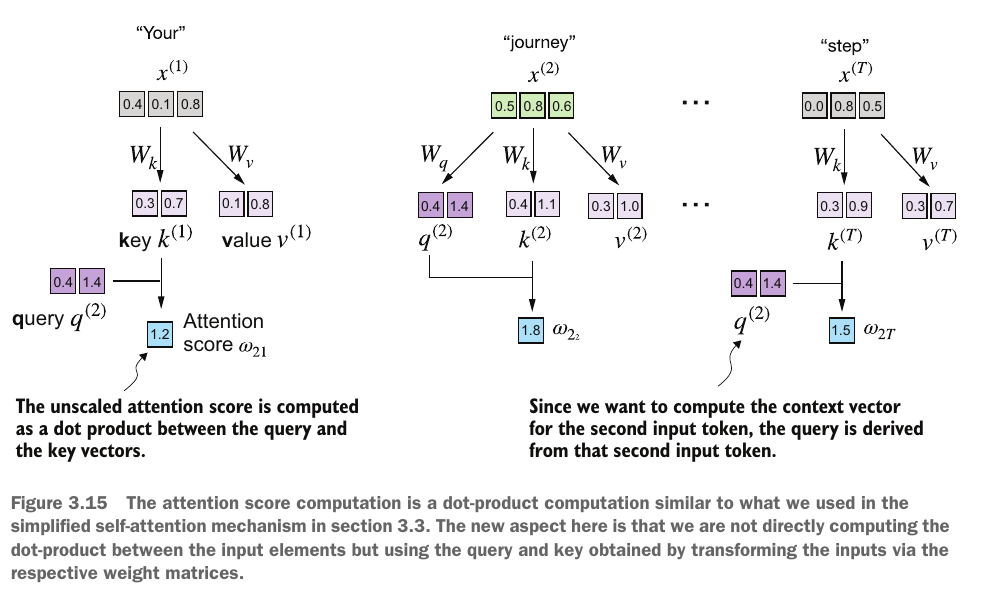
</div>

In [52]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k ** 0.5, dim=-1)

In [53]:
print(attn_weights_2)

tensor([0.1648, 0.1803, 0.1795, 0.1572, 0.1522, 0.1659])


In [54]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.9891, 1.0748])


<div align="center">
  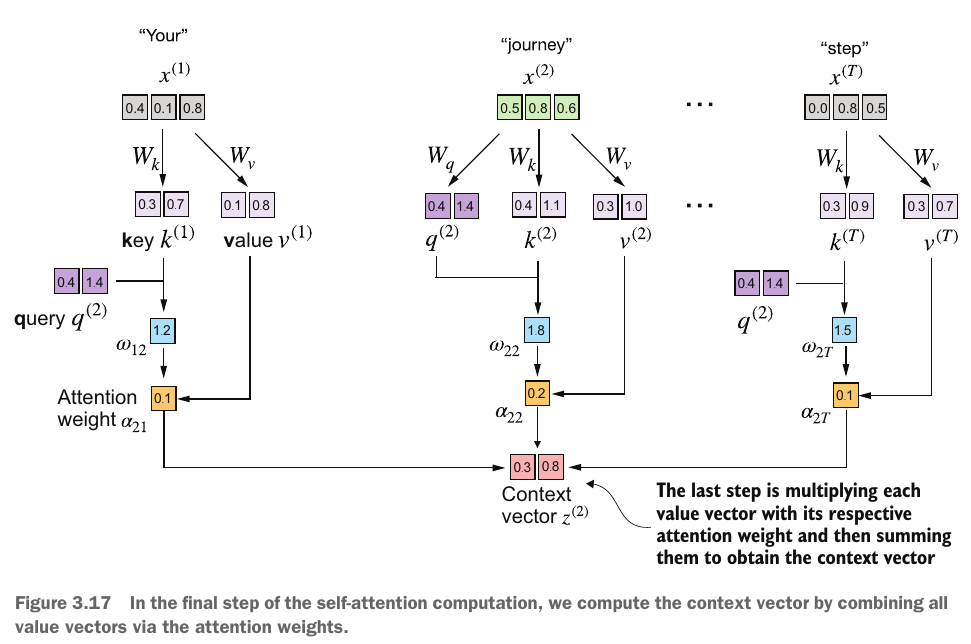
</div>